In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from collections import OrderedDict
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


## Analysing the dataset 

Using graphs and dataframes to describe the kind of dataset you'll be working on?

In [3]:
dataset = pd.read_csv('spam.csv', encoding='latin-1')
dataset.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
dataset = dataset.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
dataset = dataset.rename(columns = {'v1':'Label','v2':'Message'})

In [5]:
dataset.groupby('Label').describe()

Message                                                               
        count unique                                                top freq
Label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [6]:
dataset['length'] = dataset['Message'].apply(len)
dataset.head(10)

,Label,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,158
9,spam,Had your mobile 11 months or more? U R entitle...,154


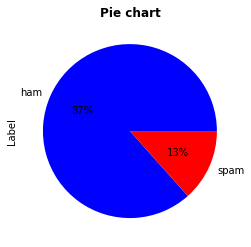

In [9]:
counttype=pd.value_counts(dataset["Label"], sort= True)
counttype.plot(kind = 'pie', colors=['blue','red'], autopct='%1.0f%%')
plt.title('Pie chart',fontweight = 'bold')
plt.show()

In [10]:
from collections import Counter

In [11]:
count1 = Counter(" ".join(dataset[dataset['Label']=='ham']["Message"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(dataset[dataset['Label']=='spam']["Message"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

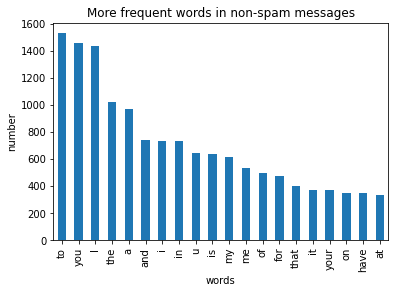

In [12]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

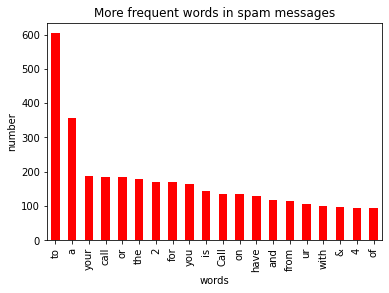

In [13]:
df2.plot.bar(legend = False, color = 'red')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e0864c1d0>,
      dtype=object)

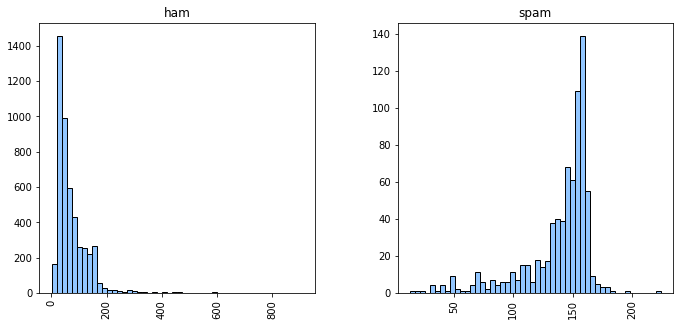

In [14]:
mpl.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-pastel')
dataset.hist(column='length', by='Label', bins=50,figsize=(11,5))

## Predictive Analysis

Cleaning the data and checking the accuracy of classification by different classifier algorithms.

In [15]:
textframes = dataset['Message'].copy()

We are creating a new data piece to remove exclamations in the 'Messages'. It will also remove stop words like "the”, “a”, “an”, “in”.


In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    #The maketrans() method returns a mapping table that can be used with the translate() method to replace specified characters.
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    #converting every word to lower cases and joining in sentence after removing the stop words
    return " ".join(text)

In [18]:
textframes = textframes.apply(text_process) #sending the messages copy

In [19]:
textframes

0       Go jurong point crazy Available bugis n great ...
1                                 Ok lar Joking wif u oni
2       Free entry 2 wkly comp win FA Cup final tkts 2...
3                     U dun say early hor U c already say
4             Nah dont think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u U å£750 Pound prize...
5568                          Ì b going esplanade fr home
5569                          Pity mood Soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       Rofl true name
Name: Message, Length: 5572, dtype: object

In [20]:
vectorizer = TfidfVectorizer('english')
features = vectorizer.fit_transform(textframes)

**TF-IDF** is a method which gives us a numerical weightage of words which reflects how important the particular word is to a document in a corpus. A corpus is a collection of documents.

`Tf is Term frequency, and IDF is Inverse document frequency. This method is often used for information retrieval and text mining.`

`This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.`

[More on TF-IDF](https://https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a)

In [21]:
features_train, features_test, labels_train, labels_test = train_test_split(features, dataset['Label'], test_size=0.3, random_state=111)
#X values is that of features and Y value is the label that is HAM/Non HAM

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [23]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

In [24]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc}

In [25]:
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)

def predict_labels(clf, features):
    return (clf.predict(features))

In [26]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [27]:
testscores = pd.DataFrame.from_dict(OrderedDict(pred_scores),orient='index', columns=['Score'])

In [ ]:
testscores

,Score
SVC,0.978469
KN,0.924641
NB,0.984450
DT,0.958732
LR,0.943182
RF,0.970096


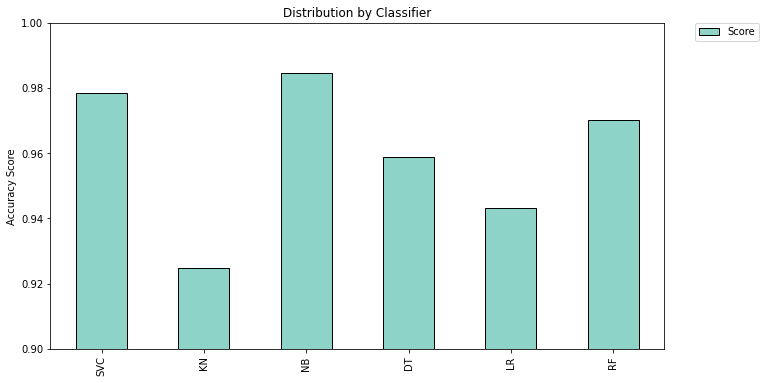

In [28]:
testscores.plot(kind='bar', ylim=(0.9,1.0), figsize=(11,6), align='center', colormap="Set3")
plt.xticks(np.arange(len(testscores['Score'])), testscores.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Ensemble Algorithms like Decision Trees and Random Forest have performed relatively poor in comparision to Support Vector Machine and Naive Bayes.

Stemming is Text Normalization, these techniques in the field of Natural Language Processing are used to prepare text, words, and documents for further processing.


```
Playing, Plays, Played are having a common root "play".
Similarly Cars, Car's, car have a common root "car".
Stemming helps us to achieve the root forms.
```
*Stemming is widely used in tagging systems, indexing, SEOs, Web search results, and information retrieval. For example, searching for fish on Google will also result in fishes, fishing as fish is the stem of both words.*


In [29]:
def stemmer (text):
    text = text.split()
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [30]:
textframes = textframes.apply(stemmer)

In [31]:
textframes

0       go jurong point crazi avail bugi n great world...
1                                  ok lar joke wif u oni 
2       free entri 2 wkli comp win fa cup final tkts 2...
3                    u dun say earli hor u c alreadi say 
4              nah dont think goe usf live around though 
                              ...                        
5567    2nd time tri 2 contact u u å£750 pound prize 2...
5568                             ì b go esplanad fr home 
5569                             piti mood soani suggest 
5570    guy bitch act like id interest buy someth els ...
5571                                      rofl true name 
Name: Message, Length: 5572, dtype: object

In [32]:
features = vectorizer.fit_transform(textframes)

In [33]:
features_train, features_test, labels_train, labels_test = train_test_split(features, dataset['Label'], test_size=0.3, random_state=111)

In [34]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [35]:
testscores2 = pd.DataFrame.from_dict(OrderedDict(pred_scores),orient='index', columns=['Score2'])
testscores = pd.concat([testscores,testscores2],axis=1)

In [36]:
testscores

,Score,Score2
SVC,0.978469,0.978469
KN,0.924641,0.927632
NB,0.984450,0.985048
DT,0.958732,0.959928
LR,0.943182,0.946770
RF,0.970096,0.974880


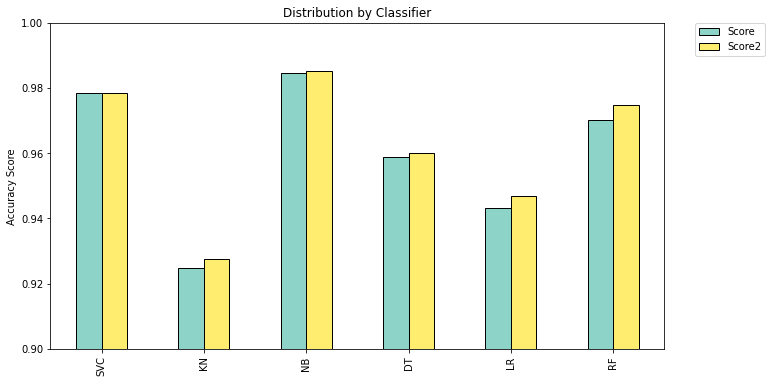

In [37]:
testscores.plot(kind='bar', ylim=(0.9,1.0), figsize=(11,6), align='center', colormap="Set3")
plt.xticks(np.arange(len(testscores['Score'])), testscores.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

After consider a normal message with **stop words removed** and **shortening the length of the word to just its root (Stemming)**, we will now check the accuracy of these classfiers considering a key factor that is, **length** of the messages.

In [38]:
lf = dataset['length'].values #Convert the frame to its Numpy-array representation.
newfeat = np.hstack((features.todense(),lf[:, None])) 
#The hstack() function is used to stack arrays in sequence horizontally (column wise).

In [39]:
features_train, features_test, labels_train, labels_test = train_test_split(newfeat, dataset['Label'], test_size=0.3, random_state=111)

In [40]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [41]:
testscores3 = pd.DataFrame.from_dict(OrderedDict(pred_scores),orient='index', columns=['Score3'])
testscores = pd.concat([testscores,testscores3],axis=1)

In [42]:
testscores

,Score,Score2,Score3
SVC,0.978469,0.978469,0.861244
KN,0.924641,0.927632,0.881579
NB,0.984450,0.985048,0.982656
DT,0.958732,0.959928,0.957536
LR,0.943182,0.946770,0.954545
RF,0.970096,0.974880,0.975478


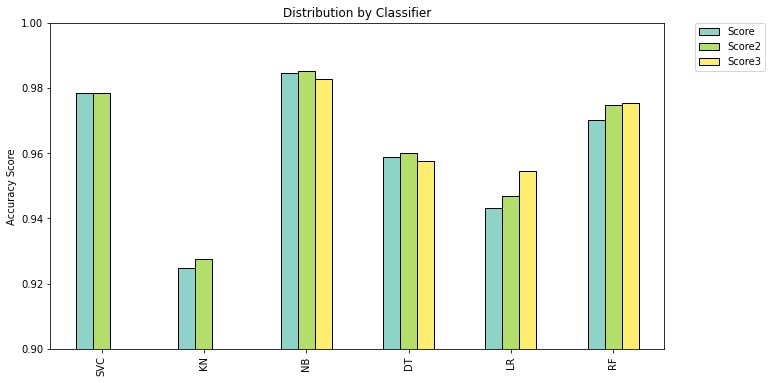

In [43]:
testscores.plot(kind='bar', ylim=(0.9,1.0), figsize=(11,6), align='center', colormap="Set3")
plt.xticks(np.arange(len(testscores['Score'])), testscores.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

This time everyone are doing a little bit worse, except for LinearRegression and RandomForest. But the winner is still Multinominal Naive Bayes.